<a href="https://colab.research.google.com/github/oilnutttt/bsc_dpdm22/blob/main/Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

# รายชื่อสมาชิกกลุ่ม
- 3. นางสาวณัชกมล อัมฤตานนท์ 633020439-4
- 6. นางสาวทิพเกษร ยอดคุณ 633020442-5
- 25. นางสาวปิ่นมนัส สุระเกษ 633021018-3
- 34. นางสาวอภิศรา พงษ์เซียงซา 633021027-2

# สไลด์
https://www.canva.com/design/DAFeaN7R7Rk/8a-Tv8L1AYjlV7AKroX-sg/edit?utm_content=DAFeaN7R7Rk&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [1]:
import pandas as pd
import os

In [2]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#association rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#k-means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#association rules
#!pip install apyori
#from apyori import apriori

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# import data

In [5]:
data_salary = pd.read_csv('/content/gdrive/MyDrive/bscpj/salary.csv')
print(data_salary.shape)
data_salary.head(3)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Data preparation

## สร้างคอลัมน์ ID ให้กับข้อมูล

In [6]:
#data_salary['ID'] = data_salary.reset_index().index

## Select columns

In [7]:
data_salary.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
data = data_salary[['age', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 
       'hours-per-week', 'native-country',
       'salary']]

In [9]:
data.shape

(32561, 11)

## check missing

In [10]:
data.isnull().any()

age               False
workclass         False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
hours-per-week    False
native-country    False
salary            False
dtype: bool

จากการ check missing พบว่า ไม่มี missing

แต่มีข้อมูลที่ไม่รู้ คือ ?

In [11]:
data[(data['workclass'] == ' ?') | (data['occupation'] == ' ?') | (data['native-country'] == ' ?')].shape

(2399, 11)

จึงทำการ drop ออก

In [12]:
data.drop(data.loc[(data['workclass'] == ' ?') | (data['occupation'] == ' ?') | (data['native-country'] == ' ?')].index, inplace=True)

<ipython-input-12-c4d5fc988110>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.loc[(data['workclass'] == ' ?') | (data['occupation'] == ' ?') | (data['native-country'] == ' ?')].index, inplace=True)


## เปลี่ยนค่าในคอลัมน์ salary โดย
- ' <=50K' เป็น 0
- ' >50K' เป็น 1

In [13]:
data['salary'] = data['salary'].map({' <=50K': 0, ' >50K': 1})

<ipython-input-13-44f8c87484ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary'] = data['salary'].map({' <=50K': 0, ' >50K': 1})


In [14]:
data.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


## Convert categorical variables to numerical

โค้ดดังกล่าวเป็นการแปลงข้อมูลในคอลัมน์ 'workclass' ให้อยู่ในรูปแบบของ category และทำการ encoding เป็นรหัส (codes) ซึ่งจะช่วยให้สามารถนำไปใช้กับแบบจำลองที่รับเฉพาะข้อมูลแบบตัวเลขได้ เช่น decision tree หรือ logistic regression ซึ่งต้องการข้อมูลที่เป็นตัวเลขเท่านั้น โดยรหัสที่ถูกแทนให้จะเป็นตัวเลขที่มีค่าต่างๆ ตามจำนวน category ที่มีในคอลัมน์นั้นๆ

In [15]:
data['workclass'] = data['workclass'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['marital-status'] = data['marital-status'].astype('category').cat.codes
data['occupation'] = data['occupation'].astype('category').cat.codes
data['relationship'] = data['relationship'].astype('category').cat.codes
data['race'] = data['race'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes
data['native-country'] = data['native-country'].astype('category').cat.codes

<ipython-input-15-4c00740fa26e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'] = data['workclass'].astype('category').cat.codes
<ipython-input-15-4c00740fa26e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = data['education'].astype('category').cat.codes
<ipython-input-15-4c00740fa26e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [16]:
data.head(3)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,5,9,4,0,1,4,1,40,38,0
1,50,4,9,2,3,0,4,1,13,38,0
2,38,2,11,0,5,1,4,1,40,38,0


## Split the data into training and testing sets

X คือ feature หรือตัวแปรที่ใช้ในการทำนาย และ y คือ target หรือผลลัพธ์ที่ต้องการทำนาย

In [17]:
features = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',  'hours-per-week', 'native-country']
X = data[features]
y = data['salary']

โดยแบ่งเป็น train 70% test 30%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision tree

## ทำ 10-fold-cross-validation เพื่อหาค่า maxdept และ min_samples_split ที่เหมาะสมที่สุด

In [19]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter values to be tested
param_grid = {'max_depth': [1,2,3],
              'min_samples_split': [2, 4, 6]}

# Use Grid Search to find the best hyperparameter combination
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter combination and the associated accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best hyperparameters:", best_params)
print(f'Best accuracy score: {best_score:.2f}')

Best hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Best accuracy score: 0.79


## Define , Train and Predict - evaluate

In [20]:
#Define
clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2)

# Train
clf.fit(X_train, y_train)

# Evaluate 
y_pred = clf.predict(X_test)

- max_depth เป็นพารามิเตอร์ที่ใช้กำหนดความลึกของต้นไม้การตัดสินใจ (decision tree) ในการสร้างโมเดล โดยจะกำหนดค่าสูงสุดของระดับที่ต้นไม้จะสามารถสร้างได้ ในที่นี้เรากำหนด max_depth=3 คือต้นไม้จะสามารถสร้างได้สูงสุด 3 ชั้น หรือมีความลึกไม่เกิน 3 ระดับ
- min_samples_split เป็นพารามิเตอร์ที่ใช้ในการกำหนดจำนวนตัวอย่างขั้นต่ำที่จะต้องมีในแต่ละโหนด

## accuracy 

In [21]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification report:\n', report)

Accuracy: 0.78
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      6767
           1       0.55      0.67      0.60      2282

    accuracy                           0.78      9049
   macro avg       0.72      0.74      0.73      9049
weighted avg       0.80      0.78      0.79      9049



### หน้าตาต้นไม้

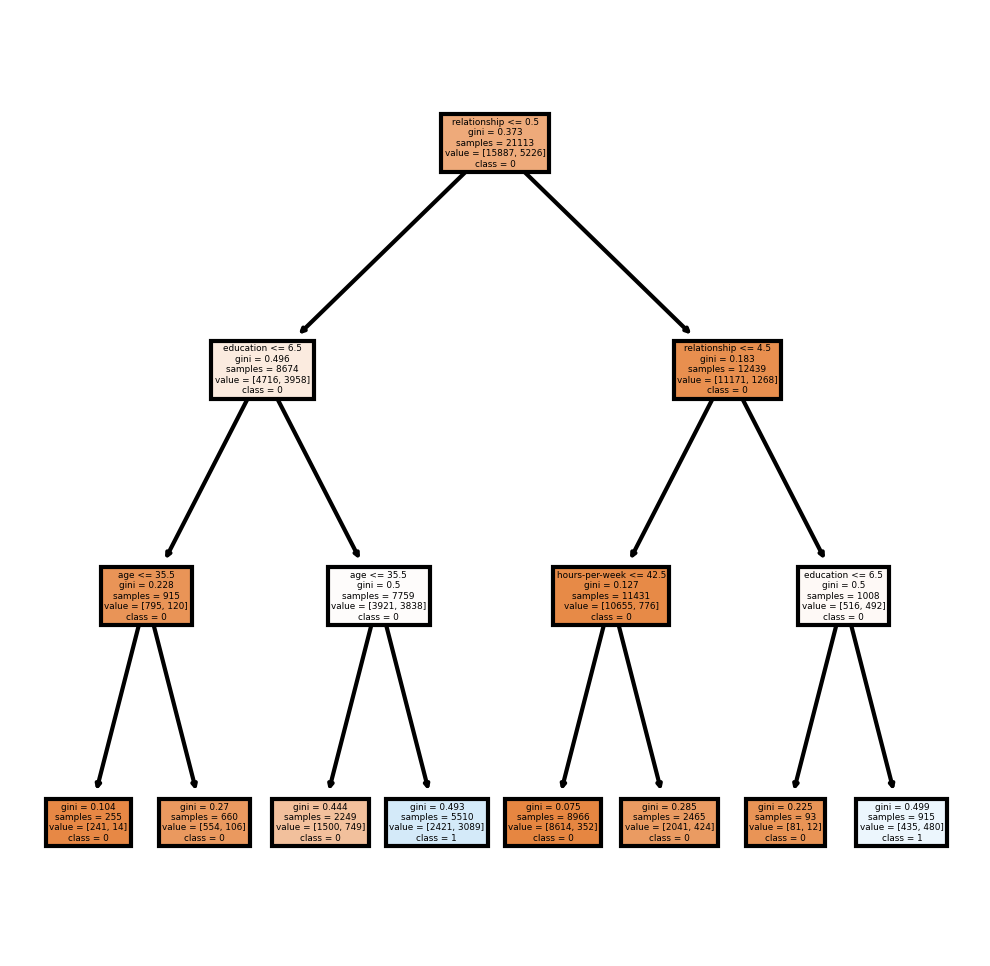

In [22]:
# Define the Decision Tree model with max_depth=3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Visualize the Decision Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1'], ax=axes);

In [23]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.astype(str).unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('decision_tree')

'decision_tree.pdf'

In [24]:
from google.colab import files
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Download the file from Colab to Google Drive
files.download('/content/decision_tree.pdf')

# Unmount Google Drive (optional)
drive.flush_and_unmount()

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Naive Bayes 

## กำหนด features และ target

Gaussian Naive Bayes ซึ่งเหมาะสำหรับข้อมูลต่อเนื่องและมีการกระจายตัวของข้อมูล จึงเหมาะสมกับข้อมูล Salary Prediction

## Define , Train and Predict - evaluate

In [25]:
#Define
gnb = GaussianNB()

#train 
gnb.fit(X_train, y_train)

#test
y_pred = gnb.predict(X_test)

## accuracy and Classification report

In [26]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification report:\n', report)

Accuracy: 0.75
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      6767
           1       0.51      0.69      0.58      2282

    accuracy                           0.75      9049
   macro avg       0.69      0.73      0.70      9049
weighted avg       0.79      0.75      0.76      9049



In [27]:
scores = cross_val_score(gnb, X_train, y_train, cv=10)
print(f'Mean cross-validation score: {scores.mean():.2f}')

Mean cross-validation score: 0.76


โดยทั่วไปแล้ว เราจะใช้ precision และ recall เพื่อประเมินประสิทธิภาพของโมเดล โดย precision คือ ความแม่นยำของโมเดลในการทำนายว่าเป็น positive class และ recall คือ ความแม่นยำของโมเดลในการตรวจจับ positive class

จากผลลัพธ์ที่ได้จะเห็นได้ว่าโมเดล Naive Bayes ที่ใช้กับข้อมูล Salary Classification มีความแม่นยำในการทำนายประเภทเฉพาะ (class 0) ที่ดีกว่าการทำนายประเภทอื่นๆ (class 1) โดยมีค่า precision และ recall สูงขึ้นสำหรับ class 0 โดยที่มีค่า f1-score สูงสุดที่ 0.82 สำหรับ class 0 และ 0.58 สำหรับ class 1

- Precision (ค่าความแม่นยำ) คือ อัตราส่วนของจำนวนเคสที่ทำนายถูกต้องเทียบกับจำนวนเคสที่โมเดลทำนายว่าเป็น positive class โดย Precision เพิ่มขึ้นเมื่อโมเดลทำนายถูกต้องและมีจำนวน False Positive น้อยลง

- Recall (ค่าความจำเป็น) คือ อัตราส่วนของจำนวนเคสที่ทำนายถูกต้องเทียบกับจำนวนเคสที่เป็น positive class โดย Recall เพิ่มขึ้นเมื่อโมเดลทำนายถูกต้องและมีจำนวน False Negative น้อยลง

- F1-score (ค่าเฉลี่ยความแม่นยำและความจำเป็น) คือ ค่าเฉลี่ยเอกลักษณ์ระหว่าง Precision และ Recall ที่สามารถใช้ประเมินประสิทธิภาพของโมเดลได้รวมกัน โดยค่า - - - - F1-score เพิ่มขึ้นเมื่อ Precision และ Recall มีค่าใกล้เคียงกัน

- Support (จำนวนเคสในแต่ละ class) คือ จำนวนเคสที่อยู่ในแต่ละ class ซึ่งใช้ในการคำนวณ Precision, Recall และ F1-score ของแต่ละ class

สรุปคือ Precision, Recall, F1-score และ Support ใช้ในการวัดประสิทธิภาพของโมเดล Classification โดยที่ Precision และ Recall จะเน้นการทำนายแต่ละ class ให้ถูกต้อง ส่วน F1-score จะใช้รวมประสิทธิภาพของแต่ละ class และใช้ค่า Support เพื่อดูว่าข้อมูลในแต่ละ class มีจำนวนมากน้อยแค่ไหน

# K-Nearest Neighbor

โดยวิธีการทำงานของ KNN คือ การหา k จำนวนของ record ที่อยู่ใกล้กับ record ที่เราต้องการ classify และทำการหา class ที่มีจำนวนมากที่สุดใน k record นั้น ๆ แล้วกำหนด class นั้นให้กับ record นั้น ๆ

ค่า k ควรเลือกตั้งแต่ 1-20 ถ้าเกินนี้ข้อมูลอาจจะ overfitting

## หา k ที่ดี

ใช้วิธี GridSearchCV ซึ่งจะทำการทดสอบค่า k ต่าง ๆ และเลือกค่า k ที่ให้ผลลัพธ์ที่ดีที่สุด

In [28]:
# กำหนดค่า k ที่ต้องการทดสอบ
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 17, 19]}

# สร้างโมเดล KNN
knn = KNeighborsClassifier()

# ใช้ GridSearchCV ในการหาค่า k ที่ดีที่สุด
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# แสดงค่า k ที่ดีที่สุด
print("Best k: ", grid_search.best_params_['n_neighbors'])

Best k:  13


## normalize ข้อมูลด้วย StandardScaler

In [29]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define , Train and Predict - evaluate

In [30]:
#Define
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')

#Train
knn.fit(X_train, y_train)

#evalution
y_pred = knn.predict(X_test)

metric='euclidean' คือการระบุวิธีการคำนวณระยะห่างระหว่างจุด ซึ่งคำนวณจากตำแหน่งของจุดในระบบพิกัดสองมิติ หรือมากกว่า 2 มิติก็ได้
นิยมใช้กันอย่างแพ่หลาย

## accuracy and Classification report

In [31]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification report:\n', report)

Accuracy: 0.81
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      6767
           1       0.65      0.57      0.61      2282

    accuracy                           0.81      9049
   macro avg       0.76      0.73      0.74      9049
weighted avg       0.81      0.81      0.81      9049



In [32]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print(f'Mean cross-validation score: {scores.mean():.2f}')

Mean cross-validation score: 0.81


# Association rules

- ในการเรียกใช้ฟังก์ชัน apriori จะมีพารามิเตอร์ use_colnames ซึ่งถ้ากำหนดเป็น True จะใช้ชื่อคอลัมน์ของข้อมูลเป็นชื่อ itemset แทนที่จะใช้ตัวเลขเป็นชื่อ itemset ในการแสดงผลลัพธ์ ซึ่งทำให้ผลลัพธ์ที่ได้ง่ายต่อการอ่านและใช้งานได้ง่ายขึ้น
- metric="lift" จึงหมายถึง การใช้ Lift เป็น metric ในการวัดความสัมพันธ์ระหว่าง items ใน transaction โดย Lift คือ ค่าที่ใช้วัดความสัมพันธ์ระหว่างสอง items โดยเปรียบเทียบระหว่างความถี่ที่พบของ item A และ item B ใน transaction กับความถี่ที่พบของ item A และ item B ในกรณีที่ไม่มีความสัมพันธ์กัน ค่า Lift มากกว่า 1 จะหมายถึงสอง items มีความสัมพันธ์กันเป็นพิเศษ โดย Lift ยิ่งมากก็แสดงว่าความสัมพันธ์ระหว่างสอง items ยิ่งเข้มแข็งมากขึ้น
- min_threshold=1 ในการวิเคราะห์ผลลัพธ์จาก association_rules หมายถึงการเลือกเฉพาะกฎที่มีค่า lift มากกว่าหรือเท่ากับ 1

In [33]:
# Rename columns to match required names
#frequent_itemsets_df = frequent_itemsets_df.rename(columns={'support': 'support', 'itemsets': 'itemsets'})

In [34]:
# convert categorical variables into binary form
df = pd.get_dummies(X, columns=['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',  'hours-per-week', 'native-country'])

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)

# Create DataFrame with support and itemsets columns
frequent_itemsets_df = pd.DataFrame(frequent_itemsets)

# generate association rules
rules = association_rules(frequent_itemsets_df.reset_index(), metric='lift', min_threshold=1)

# sort the rules by lift in descending order
rules = rules.sort_values(by='lift', ascending=False)

# show useful columns only
acc = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
acc

,antecedents,consequents,support,confidence,lift
829,"(race_4, relationship_0)","(sex_1, native-country_38, marital-status_2)",0.352463,0.938885,2.462921
816,"(sex_1, native-country_38, marital-status_2)","(race_4, relationship_0)",0.352463,0.924596,2.462921
826,"(native-country_38, relationship_0)","(race_4, sex_1, marital-status_2)",0.352463,0.931318,2.460619
819,"(race_4, sex_1, marital-status_2)","(native-country_38, relationship_0)",0.352463,0.931237,2.460619
981,"(race_4, sex_1, marital-status_2)","(workclass_2, native-country_38, relationship_0)",0.235362,0.621847,2.459176
...,...,...,...,...,...
30,(marital-status_4),(native-country_38),0.294278,0.912605,1.000800
442,"(hours-per-week_40, sex_1)","(workclass_2, native-country_38)",0.214674,0.668008,1.000668
441,"(workclass_2, native-country_38)","(hours-per-week_40, sex_1)",0.214674,0.321579,1.000668
429,"(workclass_2, hours-per-week_40, native-countr...",(race_4),0.275744,0.860261,1.000547


หากกำหนด metric="lift" และ min_threshold=1 จะหมายความว่าเราจะสร้างกฎผสมที่มีค่า lift มากกว่าหรือเท่ากับ 1 เท่านั้น

# K-means clustering

หาค่า k ที่ดีที่สุด

elbow method ซึ่งเป็นการหาค่า K ที่เหมาะสมโดยการ plot ค่า SSE (Sum of Squared Errors) ของแต่ละค่า K และหาจุดที่เกิด elbow ซึ่งเป็นจุดที่ค่า SSE เริ่มลดลงช้าลง ซึ่งจะช่วยในการเลือกค่า K ที่เหมาะสม

In [35]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

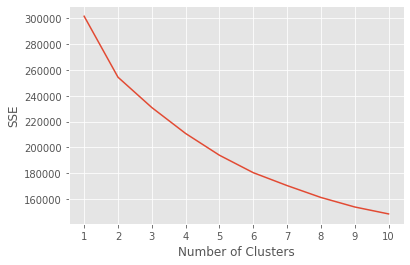

In [36]:
# standardize the data
feature_array = X.values
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(feature_array)

# calculate SSE for a range of number of cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(subset_scaled)
    sse.append(kmeans.inertia_)

# plot SSE for each value of K
plt.style.use('ggplot')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
# set number of clusters
k = 2
kmeans = KMeans(n_clusters=k)

# fit k-means clustering model
kmeans.fit(subset_scaled)

# get cluster labels
data['cluster'] = kmeans.labels_

<ipython-input-37-69d159c38d94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [38]:
data.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,cluster
0,39,5,9,4,0,1,4,1,40,38,0,0
1,50,4,9,2,3,0,4,1,13,38,0,0
2,38,2,11,0,5,1,4,1,40,38,0,0
3,53,2,1,2,5,0,2,1,40,38,0,0
4,28,2,9,2,9,5,2,0,40,4,0,1


In [39]:
data['cluster'].value_counts()

0    17863
1    12299
Name: cluster, dtype: int64

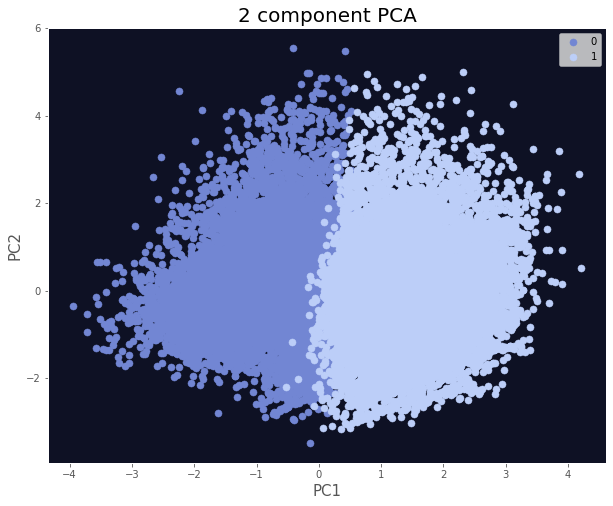

In [40]:
from sklearn.decomposition import PCA

# create PCA object
pca = PCA(n_components=2)

# fit and transform data
principalComponents = pca.fit_transform(subset_scaled)

# create dataframe with principal components and cluster labels
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf['cluster'] = kmeans.labels_

# plot the principal components colored by cluster
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_facecolor('#0E1124') # เปลี่ยนสีพื้นหลัง
targets = [0, 1]
colors = ['#7286D3','#BCCEF8']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [41]:
c0 = data[data['cluster'] == 0]
c0

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,cluster
0,39,5,9,4,0,1,4,1,40,38,0,0
1,50,4,9,2,3,0,4,1,13,38,0,0
2,38,2,11,0,5,1,4,1,40,38,0,0
3,53,2,1,2,5,0,2,1,40,38,0,0
7,52,4,11,2,3,0,4,1,45,38,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32551,32,2,0,2,5,0,0,1,40,38,0,0
32552,43,2,8,2,11,0,4,1,45,38,0,0
32554,53,2,12,2,3,0,4,1,40,38,1,0
32555,22,2,15,4,10,1,4,1,40,38,0,0


In [42]:
c1 = data[data['cluster'] == 1]
c1

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,cluster
4,28,2,9,2,9,5,2,0,40,4,0,1
5,37,2,12,2,3,5,4,0,40,38,0,1
6,49,2,6,3,7,1,2,0,16,22,0,1
8,31,2,12,4,9,1,4,0,50,38,1,1
12,23,2,9,4,0,3,4,0,30,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,2,12,4,12,1,1,1,11,35,0,1
32556,27,2,7,2,12,5,4,0,38,38,0,1
32558,58,2,11,6,0,4,4,0,40,38,0,1
32559,22,2,11,4,0,3,4,1,20,38,0,1


In [43]:
c0['age'].mean()

42.21950400268712

In [44]:
c1['age'].mean()

32.945524026343605

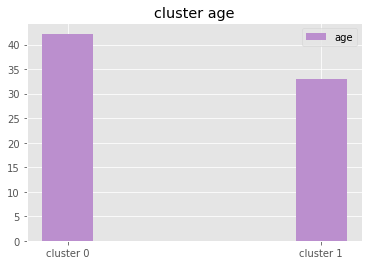

In [45]:
width = 0.2 # ความกว้างของแท่ง

plt.bar([1, 2],[c0['age'].mean(),c1['age'].mean()],width,color=['#BB8FCE'] ,label='age') 

plt.title('cluster age')
plt.xticks([1,2], ['cluster 0','cluster 1'])
plt.legend();

In [46]:
s0 = c0['sex'].value_counts().reset_index()

In [47]:
s1 = c1['sex'].value_counts().reset_index()

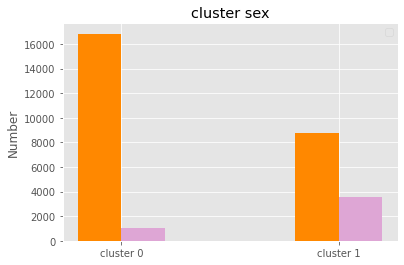

In [48]:
width = 0.2

plt.bar([0.9,1.1],[s0['sex'][0],s0['sex'][1]],width,color=['#FF8800','#DEA6D5']) # ส้ม
plt.bar([1.9,2.1],[s1['sex'][0],s1['sex'][1]],width,color=['#FF8800','#DEA6D5']) # ม่วง

plt.title('cluster sex')
plt.ylabel('Number')
plt.xticks([1,2], labels=['cluster 0','cluster 1'])
plt.legend();
plt.show();
